In [71]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from math import sqrt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

In [20]:
#Task number 4
numberOfWomen = 160;
mU = 9.5
sigma = 0.4
meanMu = 9.57

z = (mU - meanMu) / (sigma / sqrt(numberOfWomen))
print norm.cdf(z) + (1 - norm.cdf(abs(z)))

0.0268566955075


Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости ?

In [77]:
#Task number 5
data = pd.read_csv("diamonds.txt", sep="	")
# data columns carat	depth	table	price	x	y	z
Y = data.as_matrix(["price"])
X = data.as_matrix(["carat","depth","table", "x", "y","z"])

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.25)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)
sumRegressionError  = np.array(map(lambda value1, value2: abs(value2 - value1), Y_predict, Y_test))

rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, Y_train.ravel())
Y_forest_predict = rfr.predict(X_test)

sumForestError  = np.array(map(lambda value1, value2: abs(value2 - value1), Y_forest_predict, Y_test))

print sumRegressionError.sum(), sumForestError.sum()

12006725.7598 10836739.3521


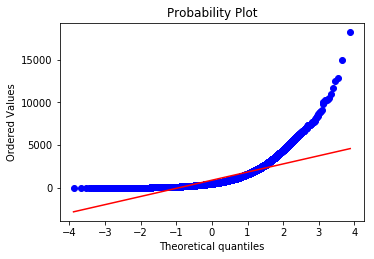

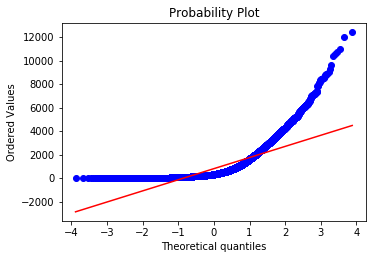

In [85]:
from statsmodels.stats.weightstats import *

pylab.figure(figsize=(12, 8))
pylab.subplot(2, 2, 1)
stats.probplot(sumRegressionError, dist="norm", plot=pylab)

pylab.figure(figsize=(12, 8))
pylab.subplot(2, 2, 2)
stats.probplot(sumForestError, dist="norm", plot=pylab)
pylab.show()

In [84]:
stats.ttest_ind(sumRegressionError, sumForestError)

Ttest_indResult(statistic=6.1531297527442144, pvalue=7.7037322226835782e-10)

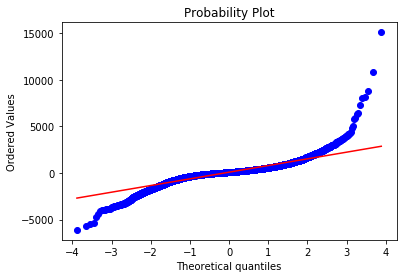

In [88]:
stats.probplot(sumRegressionError - sumForestError, dist="norm", plot=pylab)
pylab.show()